In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

FILEMAP = {
    'BTC' : r'../resources/data/raw/BTC_USDT_1m.csv',
    'ADA' : r'../resources/data/raw/ADA_USDT_1m.csv',
    'ALGO' : r'../resources/data/raw/ALGO_USDT_1m.csv',
    'ANKR': r'../resources/data/raw/ANKR_USDT_1m.csv',
}

COL_PRICE    = 'close'      # —Ü–µ–Ω–æ–≤–∞—Ç–∞ –∫–æ–ª–æ–Ω–∞ –≤ CSV-—Ç–æ
TIMEZONE     = 'UTC'        # –≤—Å–∏—á–∫–∏ –≤ UTC
RISK_FREE    = 0.00         # –≥–æ–¥–∏—à–µ–Ω r_f; 0.0 –∞–∫–æ –Ω–µ —Ç–∏ —Ç—Ä—è–±–≤–∞
WEIGHT_CAP   = 0.50         # ‚â§ 50 % –≤ –µ–¥–∏–Ω –∞–∫—Ç–∏–≤
N_PORTFOLIOS = 25_000       # –ú–æ–Ω—Ç–µ –ö–∞—Ä–ª–æ –ø—Ä–æ–±–∏
SEED         = 42
np.random.seed(SEED)

# --- 1-–º–∏–Ω—É—Ç–Ω–∏ –±–∞—Ä–æ–≤–µ ‚Üí 525 600 –Ω–∞ –≥–æ–¥–∏–Ω–∞ ----------------------------
BAR_SEC           = 60
PERIODS_PER_YEAR  = int(365 * 86_400 / BAR_SEC) 
print(f'periods_per_year = {PERIODS_PER_YEAR:,}')

periods_per_year = 525,600


In [2]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 1) –ó–∞—Ä–µ–∂–¥–∞–Ω–µ –Ω–∞ –º–∏–Ω—É—Ç–Ω–∏—Ç–µ —Ü–µ–Ω–∏                              ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
def load_iso_csv(path: str | Path,
                 price_col: str = COL_PRICE,
                 tz: str = TIMEZONE) -> pd.Series:
    """
    –ß–µ—Ç–µ CSV —Å ISO `timestamp` –∏ –≤—Ä—ä—â–∞ Series<price> (tz-aware).
    """
    df = pd.read_csv(path,
                     parse_dates=['timestamp'],
                     index_col='timestamp')
    df.index = df.index.tz_localize(tz)
    return df[price_col].astype(float)


# --- –∫–æ–º–±–∏–Ω–∏—Ä–∞–º–µ –≤—Å–∏—á–∫–∏ –∞–∫—Ç–∏–≤–∏ ----------------------------------------
prices = pd.concat(
    {tkr: load_iso_csv(p) for tkr, p in FILEMAP.items()},
    axis=1,
    join='inner'                   # –ø–∞–∑–∏–º –º–∏–Ω—É—Ç–∏—Ç–µ, –Ω–∞–ª–∏—á–Ω–∏ –∑–∞ –≤—Å–∏—á–∫–∏
).sort_index()

print(prices.head())

                                BTC     ADA    ALGO     ANKR
timestamp                                                   
2023-06-09 12:18:00+00:00  26640.01  0.3184  0.1254  0.02374
2023-06-09 12:19:00+00:00  26654.99  0.3186  0.1254  0.02376
2023-06-09 12:20:00+00:00  26661.16  0.3185  0.1255  0.02379
2023-06-09 12:21:00+00:00  26643.89  0.3196  0.1254  0.02375
2023-06-09 12:22:00+00:00  26632.23  0.3204  0.1253  0.02373


In [3]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 2) –ú–∏–Ω—É—Ç–Ω–∏ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏, ŒºÃÖ, Œ£                                ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
rets = prices.pct_change().dropna()

# –ø—Ä–æ–≤–µ—Ä–∫–∞, —á–µ —Å–∞ 1-–º–∏–Ω—É—Ç–Ω–∏
freq = rets.index.to_series().diff().dt.total_seconds().median()
assert freq == BAR_SEC, f'–û—Ç–∫—Ä–∏—Ö {freq=} —Å–µ–∫. ‚Äì –Ω–µ –µ 1-–º–∏–Ω —Å–µ—Ä–∏—è!'

means_bar = rets.mean().values                  # Œº_i  (–∑–∞ 1 –±–∞—Ä)
cov_bar   = rets.cov().values                  # Œ£    (–∑–∞ 1 –±–∞—Ä)
print(cov_bar)
tickers   = list(FILEMAP.keys())

# –∫—Ä–∞—Ç–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
stats = pd.DataFrame({'Œº_bar': means_bar,
                      'œÉ_bar': rets.std(ddof=0).values},
                     index=tickers)
stats['Sharpe_bar'] = stats['Œº_bar'] / stats['œÉ_bar']
display(stats)


[[4.32254579e-07 4.76544906e-07 4.89541909e-07 4.69839819e-07]
 [4.76544906e-07 1.27734268e-06 9.41577231e-07 8.94176147e-07]
 [4.89541909e-07 9.41577231e-07 1.78329484e-06 1.03306919e-06]
 [4.69839819e-07 8.94176147e-07 1.03306919e-06 2.05604197e-06]]


Œº_bar     œÉ_bar  Sharpe_bar
BTC   0.000002  0.000657    0.003098
ADA   0.000001  0.001130    0.001093
ALGO  0.000001  0.001335    0.001096
ANKR  0.000002  0.001434    0.001382

In [4]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 3) –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –ø–æ—Ä—Ç—Ñ–µ–π–ª–∏ (—Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –Ω–∞ —Ç–µ–≥–ª–æ—Ç–æ)         ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
n_assets = len(tickers)
results  = np.zeros((3, N_PORTFOLIOS))          # œÉ, Œº, Sharpe
weights  = np.zeros((N_PORTFOLIOS, n_assets))

i = 0
while i < N_PORTFOLIOS:
    w = np.random.random(n_assets)
    w /= w.sum()
    if (w > WEIGHT_CAP).any():          # –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏–æ–Ω–µ–Ω –ª–∏–º–∏—Ç
        continue

    mu_bar  = np.dot(w, means_bar)
    sig_bar = np.sqrt(w @ cov_bar @ w)

    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)

    weights[i]   = w
    results[0,i] = sig_ann
    results[1,i] = mu_ann
    results[2,i] = (mu_ann - RISK_FREE) / sig_ann

    i += 1

idx_max_sharpe = results[2].argmax()
idx_min_vol    = results[0].argmin()


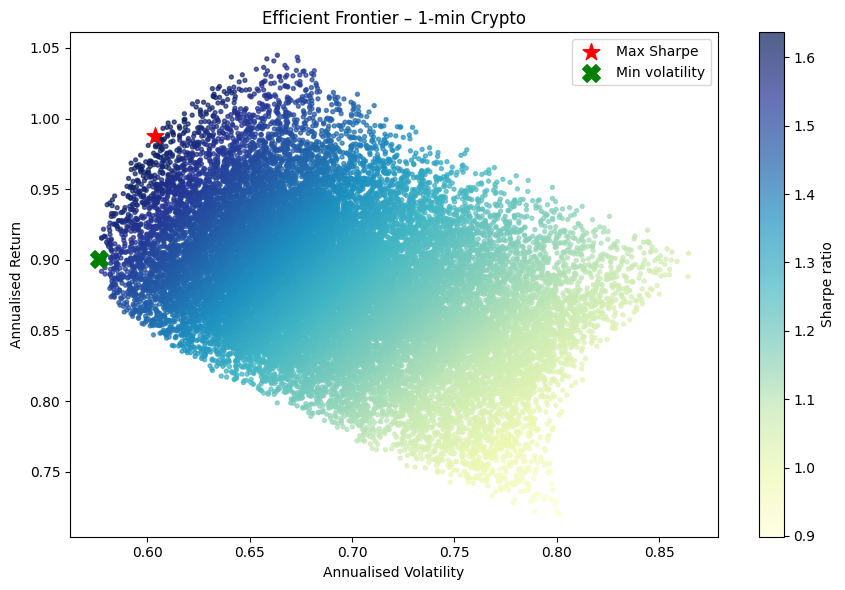

In [5]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 4) –ì—Ä–∞—Ñ–∏–∫–∞: Efficient Frontier                             ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
fig, ax = plt.subplots(figsize=(9, 6))
sc = ax.scatter(results[0], results[1],
                c=results[2], cmap='YlGnBu', s=8, alpha=0.7)
fig.colorbar(sc, label='Sharpe ratio')

ax.scatter(*results[:2, idx_max_sharpe],
           marker='*', s=160, color='r', label='Max Sharpe')
ax.scatter(*results[:2, idx_min_vol],
           marker='X', s=160, color='g', label='Min volatility')

ax.set(title='Efficient Frontier ‚Äì 1-min Crypto',
       xlabel='Annualised Volatility',
       ylabel='Annualised Return')
ax.legend(); plt.tight_layout()


In [6]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 5) –ü–æ–∫–∞–∑–≤–∞–Ω–µ –Ω–∞ —Ä–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ç–∞                             ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
alloc_max = pd.Series(weights[idx_max_sharpe], index=tickers).round(2)
alloc_min = pd.Series(weights[idx_min_vol   ], index=tickers).round(2)

print('\n' + '‚îÄ'*70)
print('–ü–û–†–¢–§–ï–ô–õ –° –ú–ê–ö–°. SHARPE')
print(f"  –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : {results[1, idx_max_sharpe]:.2%}")
print(f"  –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : {results[0, idx_max_sharpe]:.2%}\n")
display(alloc_max.to_frame('Weight').T)

print('\n' + '‚îÄ'*70)
print('–ü–û–†–¢–§–ï–ô–õ –° –ú–ò–ù. –í–û–õ–ê–¢–ò–õ–ù–û–°–¢')
print(f"  –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : {results[1, idx_min_vol]:.2%}")
print(f"  –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : {results[0, idx_min_vol]:.2%}\n")
display(alloc_min.to_frame('Weight').T)



‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
–ü–û–†–¢–§–ï–ô–õ –° –ú–ê–ö–°. SHARPE
  –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : 98.79%
  –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : 60.37%



BTC   ADA  ALGO  ANKR
Weight  0.5  0.11  0.09   0.3


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
–ü–û–†–¢–§–ï–ô–õ –° –ú–ò–ù. –í–û–õ–ê–¢–ò–õ–ù–û–°–¢
  –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : 90.08%
  –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : 57.66%



BTC   ADA  ALGO  ANKR
Weight  0.5  0.31  0.12  0.07

In [8]:
# ‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
# ‚ïë 6) –ì–µ–Ω–µ—Ç–∏—á–µ–Ω –∞–ª–≥–æ—Ä–∏—Ç—ä–º ‚Äì –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–∞ Sharpe              ‚ïë
# ‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
import random

# --------------------------------------------------------------
# –•–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –Ω–∞ GA
# --------------------------------------------------------------
POP_SIZE       = 1000          # –∫–æ–ª–∫–æ –∏–Ω–¥–∏–≤–∏–¥–∞ –≤—ä–≤ –≤—Å—è–∫–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ
NB_GENERATIONS = 50             # –∫–æ–ª–∫–æ –ø–æ–∫–æ–ª–µ–Ω–∏—è
ELITE_FRAC     = 0.10           # –Ω–∞–π-–¥–æ–±—Ä–∏—è—Ç % –∏–Ω–¥–∏–≤–∏–¥–∏, –∫–æ–∏—Ç–æ –∫–æ–ø–∏—Ä–∞–º–µ –¥–∏—Ä–µ–∫—Ç–Ω–æ
MUTATE_FRAC    = 0.15           # —à–∞–Ω—Å –¥–∞–¥–µ–Ω–æ –¥–µ—Ç–µ –¥–∞ –±—ä–¥–µ –º—É—Ç–∞–Ω—Ç
MUTATE_SCALE   = 0.10           # –∫–æ–ª–∫–æ —Å–∏–ª–Ω–æ ‚Äû—Ä–∏—Ç–∞‚Äú –º—É—Ç–∞–Ω—Ç—ä—Ç —Ç–µ–≥–ª–æ—Ç–æ
PLOT_X = 5
PLOT_Y = 5


np.random.seed(123)

# --------------------------------------------------------------
# –§–∏—Ç–Ω–µ—Å —Ñ—É–Ω–∫—Ü–∏—è ‚Äì –≥–æ–¥–∏—à–µ–Ω Sharpe
# --------------------------------------------------------------
def fitness(w: np.ndarray) -> float:
    """
    w —Ç—Ä—è–±–≤–∞ –≤–µ—á–µ –¥–∞ –µ –Ω–æ—Ä–º–∞–ª–∏–∑–∏—Ä–∞–Ω: Œ£ w_i = 1
    """
    mu_bar  = w @ means_bar
    sig_bar = np.sqrt(w @ cov_bar @ w)
    
    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)
    return (mu_ann - RISK_FREE) / sig_ann


# --------------------------------------------------------------
# GA –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∏: –∫—Ä–æ—Å–æ—É–≤—ä—Ä, –º—É—Ç–∞—Ü–∏—è, —Å—ä–∑–¥–∞–≤–∞–Ω–µ –Ω–∞ –ø–æ–∫–æ–ª–µ–Ω–∏–µ
# --------------------------------------------------------------
def crossover(p1: np.ndarray, p2: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    –°–∏–º–ø—ä–ª Œ±-crossover (Œ± ~ U[0,1])
    """
    Œ± = np.random.rand()
    c1 = Œ± * p1 + (1 - Œ±) * p2
    c2 = (1 - Œ±) * p1 + Œ± * p2
    return c1, c2

def mutate(child: np.ndarray) -> np.ndarray:
    """
    –ò–∑–±—É—Ç–≤–∞ —Å–ª—É—á–∞–π–Ω–æ —Ç–µ–≥–ª–æ —Å N(0, MUTATE_SCALE).
    –ü–æ—Å–ª–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∏—Ä–∞ –∏ —Ä–µ–∂–µ –¥–æ WEIGHT_CAP.
    """
    idx = np.random.randint(len(child))
    child[idx] += np.random.normal(0, MUTATE_SCALE)
    child = np.clip(child, 0, WEIGHT_CAP)      # –∑–∞—â–∏—Ç–Ω–æ –∏–∑—Ä—è–∑–≤–∞–Ω–µ
    child /= child.sum()
    return child

def next_generation(pop: list[np.ndarray]) -> list[np.ndarray]:
    """
    –°—ä–∑–¥–∞–≤–∞ —Å–ª–µ–¥–≤–∞—â–æ—Ç–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ:
      1. —Å–æ—Ä—Ç–∏—Ä–∞ –ø–æ fitness (–Ω–∏–∑—Ö–æ–¥—è—â)
      2. –≤–∑–µ–º–∞ ELITE_FRAC –∫–∞—Ç–æ ‚Äú–µ–ª–∏—Ç‚Äù
      3. –ø—Ä–∞–≤–∏ –¥–µ—Ü–∞ —á—Ä–µ–∑ –∫—Ä–æ—Å–æ—É–≤—ä—Ä
      4. –º—É—Ç–∏—Ä–∞ —á–∞—Å—Ç –æ—Ç –¥–µ—Ü–∞—Ç–∞
      5. –Ω–æ—Ä–º–∞–ª–∏–∑–∏—Ä–∞ —Ç–µ–≥–ª–∞—Ç–∞
    """
    pop = sorted(pop, key=fitness, reverse=True)
    elite_n = int(len(pop) * ELITE_FRAC)
    new_pop = pop[:elite_n]                       # –∑–∞–ø–∞–∑–≤–∞–º–µ –µ–ª–∏—Ç–∞
    
    # ‚Äì‚Äì‚Äì —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–∞–º–µ –µ–ª–∏—Ç–∞, –∑–∞ –¥–∞ –ø—Ä–∞–≤–∏–º —Å–ª—É—á–∞–π–Ω–∏ –¥–≤–æ–π–∫–∏
    random.shuffle(new_pop)
    parents = new_pop.copy()
    
    # ‚Äì‚Äì‚Äì –∫—Ä–æ—Å–æ—É–≤—ä—Ä
    children = []
    for p1, p2 in zip(parents[::2], parents[1::2]):
        c1, c2 = crossover(p1, p2)
        children.extend([c1, c2])
    
    # ‚Äì‚Äì‚Äì –º—É—Ç–∞—Ü–∏–∏
    for k in range(len(children)):
        if np.random.rand() < MUTATE_FRAC:
            children[k] = mutate(children[k])
        # –∑–∞–¥—ä–ª–∂–∏—Ç–µ–ª–Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è + cap
        children[k] = np.clip(children[k], 0, WEIGHT_CAP)
        children[k] /= children[k].sum()
    
    new_pop.extend(children)
    
    # –∞–∫–æ –ø–æ–ø—É–ª–∞—Ü–∏—è—Ç–∞ –µ –Ω–µ–¥–æ—Å—Ç–∞—Ç—ä—á–Ω–∞ (–Ω–µ—á–µ—Ç–µ–Ω –±—Ä–æ–π —Ä–æ–¥–∏—Ç–µ–ª–∏)
    while len(new_pop) < POP_SIZE:
        w = np.random.random(len(tickers))
        w /= w.sum()
        if (w > WEIGHT_CAP).any():
            continue
        new_pop.append(w)
    return new_pop[:POP_SIZE]


# hyperparameters optimizer
import numpy as np, random, math, optuna, time
from copy import deepcopy
def run_ga_once(pop_size, nb_generations, elite_frac,
                mutate_frac, mutate_scale,
                weight_cap, seed=None):
    """
    –°—Ç–∞—Ä—Ç–∏—Ä–∞ –ï–î–ù–û –∏–∑–ø—ä–ª–Ω–µ–Ω–∏–µ –Ω–∞ GA —Å –ø–æ–¥–∞–¥–µ–Ω–∏—Ç–µ —Ö–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏.
    –í—Ä—ä—â–∞ Sharpe –Ω–∞ –Ω–∞–π-–¥–æ–±—Ä–∏—è –∏–Ω–¥–∏–≤–∏–¥.
    """

    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    # -------------- –ª–æ–∫–∞–ª–Ω–∏ override-–∏ –Ω–∞ –≥–ª–æ–±–∞–ª–Ω–∏—Ç–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∏ --------------
    global POP_SIZE, NB_GENERATIONS, ELITE_FRAC
    global MUTATE_FRAC, MUTATE_SCALE, WEIGHT_CAP

    POP_SIZE       = pop_size
    NB_GENERATIONS = nb_generations
    ELITE_FRAC     = elite_frac
    MUTATE_FRAC    = mutate_frac
    MUTATE_SCALE   = mutate_scale
    WEIGHT_CAP     = weight_cap          # –Ω–æ–≤ –ø–∞—Ä–∞–º–µ—Ç—ä—Ä!

    # -------------- –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–∞–º–µ –ø—ä—Ä–≤–æ—Ç–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ ------------------------
    population = []
    while len(population) < POP_SIZE:
        w = np.random.random(len(tickers))
        w /= w.sum()
        if (w > WEIGHT_CAP).any():
            continue
        population.append(w)

    # -------------- –µ–≤–æ–ª—é–∏—Ä–∞–º–µ ----------------------------------------------
    best_fit = -math.inf
    for g in range(NB_GENERATIONS):
        population = next_generation(population)
        # –æ—Ü–µ–Ω—è–≤–∞–º–µ –µ–ª–∏—Ç–∞
        top = max(population, key=fitness)
        best_fit = max(best_fit, fitness(top))

    return best_fit   # ‚Üë Sharpe –Ω–∞ –Ω–∞–π-—Å–∏–ª–Ω–∏—è –∏–Ω–¥–∏–≤–∏–¥

def objective(trial: optuna.trial.Trial) -> float:
    """
    Optuna —â–µ –ø—Ä–æ–±–≤–∞ —Ä–∞–∑–ª–∏—á–Ω–∏ GA-—Ö–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –∏ —â–µ
    –≤—Ä—ä—â–∞ >>—Å—Ä–µ–¥–Ω–∏—è<< Sharpe –æ—Ç K —Ä–µ—Å—Ç–∞—Ä—Ç–∞ –Ω–∞ GA.
    """
    # 1) –¥–µ—Ñ–∏–Ω–∏—Ä–∞–º–µ —Ç—ä—Ä—Å–µ–Ω–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ
    pop_size       = trial.suggest_int   ('pop_size',        200, 1500, step=100)
    nb_generations = trial.suggest_int   ('nb_generations',   20, 200,  step=10)
    elite_frac     = trial.suggest_float ('elite_frac',      0.05, 0.35)
    mutate_frac    = trial.suggest_float ('mutate_frac',     0.05, 0.40)
    mutate_scale   = trial.suggest_float ('mutate_scale',    0.01, 0.50, log=True)
    weight_cap     = trial.suggest_float ('weight_cap',      0.30, 0.70)

    # 2) –∑–∞ —Å—Ç–∞–±–∏–ª–Ω–æ—Å—Ç ‚Äí —Å—Ç–∞—Ä—Ç–∏—Ä–∞–º–µ GA K –ø—ä—Ç–∏ —Å —Ä–∞–∑–ª. seed
    K, scores = 3, []
    for k in range(K):
        seed = 2024 + k
        score = run_ga_once(pop_size, nb_generations,
                            elite_frac, mutate_frac, mutate_scale,
                            weight_cap, seed=seed)
        scores.append(score)

    # 3) Optuna –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–∞ -> –≤—Ä—ä—â–∞–º–µ —Å—Ä–µ–¥–Ω–∞—Ç–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç
    return float(np.mean(scores))

study = optuna.create_study(direction="maximize",
                            sampler=optuna.samplers.TPESampler(),
                            pruner =optuna.pruners.MedianPruner(
                                        n_startup_trials=10, n_warmup_steps=5))
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
study.optimize(objective,
               n_trials = 40,          # –∏–ª–∏ –ø–æ –≤—Ä–µ–º–µ: timeout=3600
               show_progress_bar=True)

print("üèÜ –ù–∞–π-–¥–æ–±—Ä–∏—Ç–µ GA-—Ö–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏:")
for k, v in study.best_trial.params.items():
    print(f"  {k:15s} : {v}")
print("–°—Ä–µ–¥–µ–Ω Sharpe  :", study.best_value)




[I 2025-06-27 21:36:36,321] A new study created in memory with name: no-name-141a004d-503c-46e5-93aa-025c71ccad37
Best trial: 0. Best value: 1.91485:   2%|‚ñà‚ñà‚ñâ                                                                                                                 | 1/40 [00:18<11:53, 18.31s/it]

[I 2025-06-27 21:36:54,620] Trial 0 finished with value: 1.9148503693237802 and parameters: {'pop_size': 1300, 'nb_generations': 170, 'elite_frac': 0.31175372757520925, 'mutate_frac': 0.33935559049555747, 'mutate_scale': 0.016500843707905263, 'weight_cap': 0.6515179151707886}. Best is trial 0 with value: 1.9148503693237802.


Best trial: 1. Best value: 2.24462:   5%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                                              | 2/40 [00:22<06:18,  9.96s/it]

[I 2025-06-27 21:36:58,741] Trial 1 finished with value: 2.244621113661075 and parameters: {'pop_size': 1000, 'nb_generations': 50, 'elite_frac': 0.26379030976157225, 'mutate_frac': 0.28913792390552795, 'mutate_scale': 0.21045173108248827, 'weight_cap': 0.6688916372991749}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:   8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                           | 3/40 [00:27<04:48,  7.81s/it]

[I 2025-06-27 21:37:03,994] Trial 2 finished with value: 1.5516082756837337 and parameters: {'pop_size': 600, 'nb_generations': 80, 'elite_frac': 0.07054656531657233, 'mutate_frac': 0.1647297881927725, 'mutate_scale': 0.05780573037309031, 'weight_cap': 0.4029725956873666}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                        | 4/40 [00:31<03:39,  6.10s/it]

[I 2025-06-27 21:37:07,476] Trial 3 finished with value: 1.7200775933478774 and parameters: {'pop_size': 300, 'nb_generations': 130, 'elite_frac': 0.19545620902989375, 'mutate_frac': 0.23754420941435855, 'mutate_scale': 0.04396741305325146, 'weight_cap': 0.5111437917465497}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                     | 5/40 [00:35<03:13,  5.52s/it]

[I 2025-06-27 21:37:11,975] Trial 4 finished with value: 1.8372317421129745 and parameters: {'pop_size': 1000, 'nb_generations': 50, 'elite_frac': 0.1536795433367244, 'mutate_frac': 0.33701234525993146, 'mutate_scale': 0.012155844705882768, 'weight_cap': 0.6215634408142152}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                  | 6/40 [00:39<02:44,  4.85s/it]

[I 2025-06-27 21:37:15,506] Trial 5 finished with value: 1.559056783414105 and parameters: {'pop_size': 1200, 'nb_generations': 20, 'elite_frac': 0.30667818605253694, 'mutate_frac': 0.12958459906704933, 'mutate_scale': 0.14838701616796265, 'weight_cap': 0.33531075977139235}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                               | 7/40 [00:53<04:25,  8.05s/it]

[I 2025-06-27 21:37:30,145] Trial 6 finished with value: 1.7819825206203694 and parameters: {'pop_size': 800, 'nb_generations': 200, 'elite_frac': 0.0982150596238195, 'mutate_frac': 0.29468116150720813, 'mutate_scale': 0.041255012059448766, 'weight_cap': 0.5399106320021838}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                            | 8/40 [01:00<04:02,  7.57s/it]

[I 2025-06-27 21:37:36,692] Trial 7 finished with value: 2.0462983210593975 and parameters: {'pop_size': 1200, 'nb_generations': 60, 'elite_frac': 0.05723825362671845, 'mutate_frac': 0.1775256471681435, 'mutate_scale': 0.12264221675017155, 'weight_cap': 0.5876628726171789}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  22%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                          | 9/40 [01:03<03:09,  6.10s/it]

[I 2025-06-27 21:37:39,552] Trial 8 finished with value: 1.7965331268139721 and parameters: {'pop_size': 1400, 'nb_generations': 20, 'elite_frac': 0.12984734084343383, 'mutate_frac': 0.1193698051790733, 'mutate_scale': 0.2799312243528066, 'weight_cap': 0.4218163596479813}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  25%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                      | 10/40 [01:12<03:32,  7.09s/it]

[I 2025-06-27 21:37:48,853] Trial 9 finished with value: 2.2008010114474796 and parameters: {'pop_size': 800, 'nb_generations': 130, 'elite_frac': 0.32477784797758463, 'mutate_frac': 0.2323919764039824, 'mutate_scale': 0.05144440172591475, 'weight_cap': 0.6907928827418476}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  28%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                   | 11/40 [01:14<02:36,  5.40s/it]

[I 2025-06-27 21:37:50,422] Trial 10 finished with value: 2.2115801290512795 and parameters: {'pop_size': 200, 'nb_generations': 100, 'elite_frac': 0.24960064086282635, 'mutate_frac': 0.05397736245236487, 'mutate_scale': 0.3671861599636456, 'weight_cap': 0.697819429878468}. Best is trial 1 with value: 2.244621113661075.


Best trial: 1. Best value: 2.24462:  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                | 12/40 [01:15<02:01,  4.33s/it]

[I 2025-06-27 21:37:52,302] Trial 11 finished with value: 2.2432260363678207 and parameters: {'pop_size': 200, 'nb_generations': 100, 'elite_frac': 0.25167625306346003, 'mutate_frac': 0.0757283902675897, 'mutate_scale': 0.4703606960074521, 'weight_cap': 0.6967526675000351}. Best is trial 1 with value: 2.244621113661075.


Best trial: 12. Best value: 2.24566:  32%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                             | 13/40 [01:20<02:00,  4.45s/it]

[I 2025-06-27 21:37:57,049] Trial 12 finished with value: 2.245659143235646 and parameters: {'pop_size': 500, 'nb_generations': 100, 'elite_frac': 0.24818904471859576, 'mutate_frac': 0.2873042116839092, 'mutate_scale': 0.4929463161916105, 'weight_cap': 0.5791079937406236}. Best is trial 12 with value: 2.245659143235646.


Best trial: 12. Best value: 2.24566:  35%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                          | 14/40 [01:23<01:42,  3.96s/it]

[I 2025-06-27 21:37:59,863] Trial 13 finished with value: 2.2024105571589505 and parameters: {'pop_size': 500, 'nb_generations': 60, 'elite_frac': 0.24535196088796782, 'mutate_frac': 0.2776371154700549, 'mutate_scale': 0.20200255079906818, 'weight_cap': 0.558585312479262}. Best is trial 12 with value: 2.245659143235646.


Best trial: 14. Best value: 2.2457:  38%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                       | 15/40 [01:36<02:47,  6.72s/it]

[I 2025-06-27 21:38:12,968] Trial 14 finished with value: 2.2456979533938815 and parameters: {'pop_size': 1000, 'nb_generations': 140, 'elite_frac': 0.21006994969958148, 'mutate_frac': 0.39707263707155804, 'mutate_scale': 0.09735407974808069, 'weight_cap': 0.6115160805340796}. Best is trial 14 with value: 2.2456979533938815.


Best trial: 14. Best value: 2.2457:  40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                     | 16/40 [01:43<02:45,  6.88s/it]

[I 2025-06-27 21:38:20,222] Trial 15 finished with value: 1.723507831659018 and parameters: {'pop_size': 500, 'nb_generations': 150, 'elite_frac': 0.19444192537197366, 'mutate_frac': 0.3940416598386435, 'mutate_scale': 0.08405570358822174, 'weight_cap': 0.45793785742164445}. Best is trial 14 with value: 2.2456979533938815.


Best trial: 14. Best value: 2.2457:  42%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                  | 17/40 [01:54<03:06,  8.13s/it]

[I 2025-06-27 21:38:31,259] Trial 16 finished with value: 1.8666380657582051 and parameters: {'pop_size': 700, 'nb_generations': 180, 'elite_frac': 0.21319928198645433, 'mutate_frac': 0.38255519995643095, 'mutate_scale': 0.02534140214812832, 'weight_cap': 0.6058612476099565}. Best is trial 14 with value: 2.2456979533938815.


Best trial: 14. Best value: 2.2457:  45%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                               | 18/40 [02:06<03:21,  9.14s/it]

[I 2025-06-27 21:38:42,743] Trial 17 finished with value: 1.8276860548533955 and parameters: {'pop_size': 1000, 'nb_generations': 130, 'elite_frac': 0.15520426472008397, 'mutate_frac': 0.34927662639323664, 'mutate_scale': 0.09969811490012613, 'weight_cap': 0.47805972420127296}. Best is trial 14 with value: 2.2456979533938815.


Best trial: 14. Best value: 2.2457:  48%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                            | 19/40 [02:11<02:49,  8.05s/it]

[I 2025-06-27 21:38:48,259] Trial 18 finished with value: 1.7853105853275189 and parameters: {'pop_size': 400, 'nb_generations': 160, 'elite_frac': 0.22355106162279753, 'mutate_frac': 0.3164667281031496, 'mutate_scale': 0.02842309874405559, 'weight_cap': 0.5605274058048674}. Best is trial 14 with value: 2.2456979533938815.


Best trial: 19. Best value: 2.24593:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                         | 20/40 [02:20<02:43,  8.16s/it]

[I 2025-06-27 21:38:56,671] Trial 19 finished with value: 2.2459322896610914 and parameters: {'pop_size': 900, 'nb_generations': 110, 'elite_frac': 0.28772127742307063, 'mutate_frac': 0.25396902750577577, 'mutate_scale': 0.45514279757523124, 'weight_cap': 0.6342740409000395}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                      | 21/40 [02:34<03:07,  9.85s/it]

[I 2025-06-27 21:39:10,456] Trial 20 finished with value: 2.245874764556976 and parameters: {'pop_size': 1100, 'nb_generations': 140, 'elite_frac': 0.296143314318536, 'mutate_frac': 0.19360501961029006, 'mutate_scale': 0.17299513953827644, 'weight_cap': 0.6340550026910721}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                   | 22/40 [02:46<03:13, 10.75s/it]

[I 2025-06-27 21:39:23,300] Trial 21 finished with value: 2.245785920563716 and parameters: {'pop_size': 1000, 'nb_generations': 140, 'elite_frac': 0.2880146309457771, 'mutate_frac': 0.19065392667222794, 'mutate_scale': 0.16557325602735212, 'weight_cap': 0.6432419015897903}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                | 23/40 [03:01<03:24, 12.03s/it]

[I 2025-06-27 21:39:38,318] Trial 22 finished with value: 2.2450059353668803 and parameters: {'pop_size': 1500, 'nb_generations': 120, 'elite_frac': 0.3476711661990147, 'mutate_frac': 0.19774043006583997, 'mutate_scale': 0.1871882888803894, 'weight_cap': 0.6389728998282885}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                             | 24/40 [03:12<03:04, 11.53s/it]

[I 2025-06-27 21:39:48,690] Trial 23 finished with value: 2.245901780051311 and parameters: {'pop_size': 1100, 'nb_generations': 110, 'elite_frac': 0.2903213135481977, 'mutate_frac': 0.2552708286279604, 'mutate_scale': 0.2796436898195398, 'weight_cap': 0.6500551745979305}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                          | 25/40 [03:24<02:56, 11.77s/it]

[I 2025-06-27 21:40:01,001] Trial 24 finished with value: 2.243216554680728 and parameters: {'pop_size': 1200, 'nb_generations': 110, 'elite_frac': 0.2821994982400987, 'mutate_frac': 0.2545854127311121, 'mutate_scale': 0.31430787368783647, 'weight_cap': 0.5093562152688133}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                        | 26/40 [03:32<02:29, 10.71s/it]

[I 2025-06-27 21:40:09,253] Trial 25 finished with value: 2.2443417801129777 and parameters: {'pop_size': 1100, 'nb_generations': 80, 'elite_frac': 0.3418952904212965, 'mutate_frac': 0.2191040159424168, 'mutate_scale': 0.24922557865209757, 'weight_cap': 0.649834406478355}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                     | 27/40 [03:39<02:02,  9.44s/it]

[I 2025-06-27 21:40:15,732] Trial 26 finished with value: 2.243778858418507 and parameters: {'pop_size': 900, 'nb_generations': 80, 'elite_frac': 0.2815268535115654, 'mutate_frac': 0.2558183239194877, 'mutate_scale': 0.3824962488251407, 'weight_cap': 0.5967737010235591}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                  | 28/40 [03:52<02:05, 10.50s/it]

[I 2025-06-27 21:40:28,701] Trial 27 finished with value: 2.245849776675731 and parameters: {'pop_size': 1300, 'nb_generations': 110, 'elite_frac': 0.31340792192150896, 'mutate_frac': 0.20998133551996903, 'mutate_scale': 0.2532310657081509, 'weight_cap': 0.6742166132318328}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                               | 29/40 [04:07<02:10, 11.91s/it]

[I 2025-06-27 21:40:43,893] Trial 28 finished with value: 2.245088614104016 and parameters: {'pop_size': 900, 'nb_generations': 190, 'elite_frac': 0.2933545553843725, 'mutate_frac': 0.16556792235474832, 'mutate_scale': 0.3418182616807387, 'weight_cap': 0.5319018467259753}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 19. Best value: 2.24593:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                            | 30/40 [05:03<04:12, 25.21s/it]

[I 2025-06-27 21:41:40,132] Trial 29 finished with value: 2.055796806861588 and parameters: {'pop_size': 1300, 'nb_generations': 170, 'elite_frac': 0.3192032110018884, 'mutate_frac': 0.13781579887856862, 'mutate_scale': 0.13483821064546198, 'weight_cap': 0.3043800295747954}. Best is trial 19 with value: 2.2459322896610914.


Best trial: 30. Best value: 2.24594:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                         | 31/40 [05:14<03:07, 20.82s/it]

[I 2025-06-27 21:41:50,716] Trial 30 finished with value: 2.245942268329094 and parameters: {'pop_size': 700, 'nb_generations': 160, 'elite_frac': 0.2698307510672239, 'mutate_frac': 0.25586094267468, 'mutate_scale': 0.49697106574140126, 'weight_cap': 0.629222677496304}. Best is trial 30 with value: 2.245942268329094.


Best trial: 30. Best value: 2.24594:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                      | 32/40 [05:24<02:19, 17.49s/it]

[I 2025-06-27 21:42:00,451] Trial 31 finished with value: 2.2459344400882943 and parameters: {'pop_size': 700, 'nb_generations': 150, 'elite_frac': 0.2661940237440361, 'mutate_frac': 0.2600569972223196, 'mutate_scale': 0.4665957946991388, 'weight_cap': 0.6325151590897712}. Best is trial 30 with value: 2.245942268329094.


Best trial: 32. Best value: 2.24594:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                    | 33/40 [05:35<01:48, 15.51s/it]

[I 2025-06-27 21:42:11,320] Trial 32 finished with value: 2.245944249978248 and parameters: {'pop_size': 700, 'nb_generations': 160, 'elite_frac': 0.2307794979868022, 'mutate_frac': 0.2624984468959258, 'mutate_scale': 0.49900037884666953, 'weight_cap': 0.6729392342246912}. Best is trial 32 with value: 2.245944249978248.


Best trial: 33. Best value: 2.24594:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                 | 34/40 [05:50<01:33, 15.61s/it]

[I 2025-06-27 21:42:27,185] Trial 33 finished with value: 2.2459448052411872 and parameters: {'pop_size': 700, 'nb_generations': 180, 'elite_frac': 0.26859960773028757, 'mutate_frac': 0.2647068050180207, 'mutate_scale': 0.42250768899364005, 'weight_cap': 0.6760008562925272}. Best is trial 33 with value: 2.2459448052411872.


Best trial: 34. Best value: 2.24594:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä              | 35/40 [06:06<01:18, 15.70s/it]

[I 2025-06-27 21:42:43,075] Trial 34 finished with value: 2.2459448070077825 and parameters: {'pop_size': 700, 'nb_generations': 170, 'elite_frac': 0.22936331043744987, 'mutate_frac': 0.30820837105743404, 'mutate_scale': 0.4097441260467758, 'weight_cap': 0.67034690752981}. Best is trial 34 with value: 2.2459448070077825.


Best trial: 34. Best value: 2.24594:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå           | 36/40 [06:19<00:59, 14.91s/it]

[I 2025-06-27 21:42:56,147] Trial 35 finished with value: 2.2459447993261303 and parameters: {'pop_size': 700, 'nb_generations': 170, 'elite_frac': 0.22896745120856918, 'mutate_frac': 0.32984345394222053, 'mutate_scale': 0.3762052396894697, 'weight_cap': 0.6656227668985731}. Best is trial 34 with value: 2.2459448070077825.


Best trial: 36. Best value: 2.24594:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç        | 37/40 [06:31<00:41, 13.86s/it]

[I 2025-06-27 21:43:07,574] Trial 36 finished with value: 2.24594481143708 and parameters: {'pop_size': 600, 'nb_generations': 180, 'elite_frac': 0.1781320487006787, 'mutate_frac': 0.3144951174403416, 'mutate_scale': 0.22885536442423224, 'weight_cap': 0.6702392985555451}. Best is trial 36 with value: 2.24594481143708.


Best trial: 37. Best value: 2.24594:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé     | 38/40 [06:42<00:25, 12.96s/it]

[I 2025-06-27 21:43:18,429] Trial 37 finished with value: 2.245944811958917 and parameters: {'pop_size': 600, 'nb_generations': 200, 'elite_frac': 0.17811642472255637, 'mutate_frac': 0.3207496150094618, 'mutate_scale': 0.22310671793134879, 'weight_cap': 0.6646672051006266}. Best is trial 37 with value: 2.245944811958917.


Best trial: 38. Best value: 2.24594:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 39/40 [06:53<00:12, 12.45s/it]

[I 2025-06-27 21:43:29,679] Trial 38 finished with value: 2.2459448130818025 and parameters: {'pop_size': 600, 'nb_generations': 200, 'elite_frac': 0.17516861241267023, 'mutate_frac': 0.36157178218810304, 'mutate_scale': 0.22440480189467898, 'weight_cap': 0.6731088862538834}. Best is trial 38 with value: 2.2459448130818025.


Best trial: 38. Best value: 2.24594: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [07:05<00:00, 10.64s/it]

[I 2025-06-27 21:43:42,012] Trial 39 finished with value: 2.2459448130810906 and parameters: {'pop_size': 600, 'nb_generations': 200, 'elite_frac': 0.17492215983702178, 'mutate_frac': 0.36207266571645047, 'mutate_scale': 0.23274696925230418, 'weight_cap': 0.6627882324240267}. Best is trial 38 with value: 2.2459448130818025.
üèÜ –ù–∞–π-–¥–æ–±—Ä–∏—Ç–µ GA-—Ö–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏:
  pop_size        : 600
  nb_generations  : 200
  elite_frac      : 0.17516861241267023
  mutate_frac     : 0.36157178218810304
  mutate_scale    : 0.22440480189467898
  weight_cap      : 0.6731088862538834
–°—Ä–µ–¥–µ–Ω Sharpe  : 2.2459448130818025


In [11]:
    # POP_SIZE       = pop_size
    # NB_GENERATIONS = nb_generations
    # ELITE_FRAC     = elite_frac
    # MUTATE_FRAC    = mutate_frac
    # MUTATE_SCALE   = mutate_scale
    # WEIGHT_CAP     = weight_cap 
print("OPTIMIZED HYPERPARAMETERS")
print(f"POP_SIZE: {POP_SIZE}")
print(f"NB_GENERATIONS: {NB_GENERATIONS}")
print(f"ELITE_FRAC: {ELITE_FRAC}")
print(f"MUTATE_FRAC: {MUTATE_FRAC}")
print(f"MUTATE_SCALE: {MUTATE_SCALE}")
print(f"WEIGHT_CAP: {WEIGHT_CAP}")

OPTIMIZED HYPERPARAMETERS
POP_SIZE: 600
NB_GENERATIONS: 200
ELITE_FRAC: 0.17492215983702178
MUTATE_FRAC: 0.36207266571645047
MUTATE_SCALE: 0.23274696925230418
WEIGHT_CAP: 0.6627882324240267


–©–µ —Å–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–∞—Ç –ø–æ–∫–æ–ª–µ–Ω–∏—è: [0, 8, 16, 24, 33, 41, 49, 58, 66, 74, 82, 91, 99, 107, 116, 124, 132, 140, 149, 157, 165, 174, 182, 190, 199]


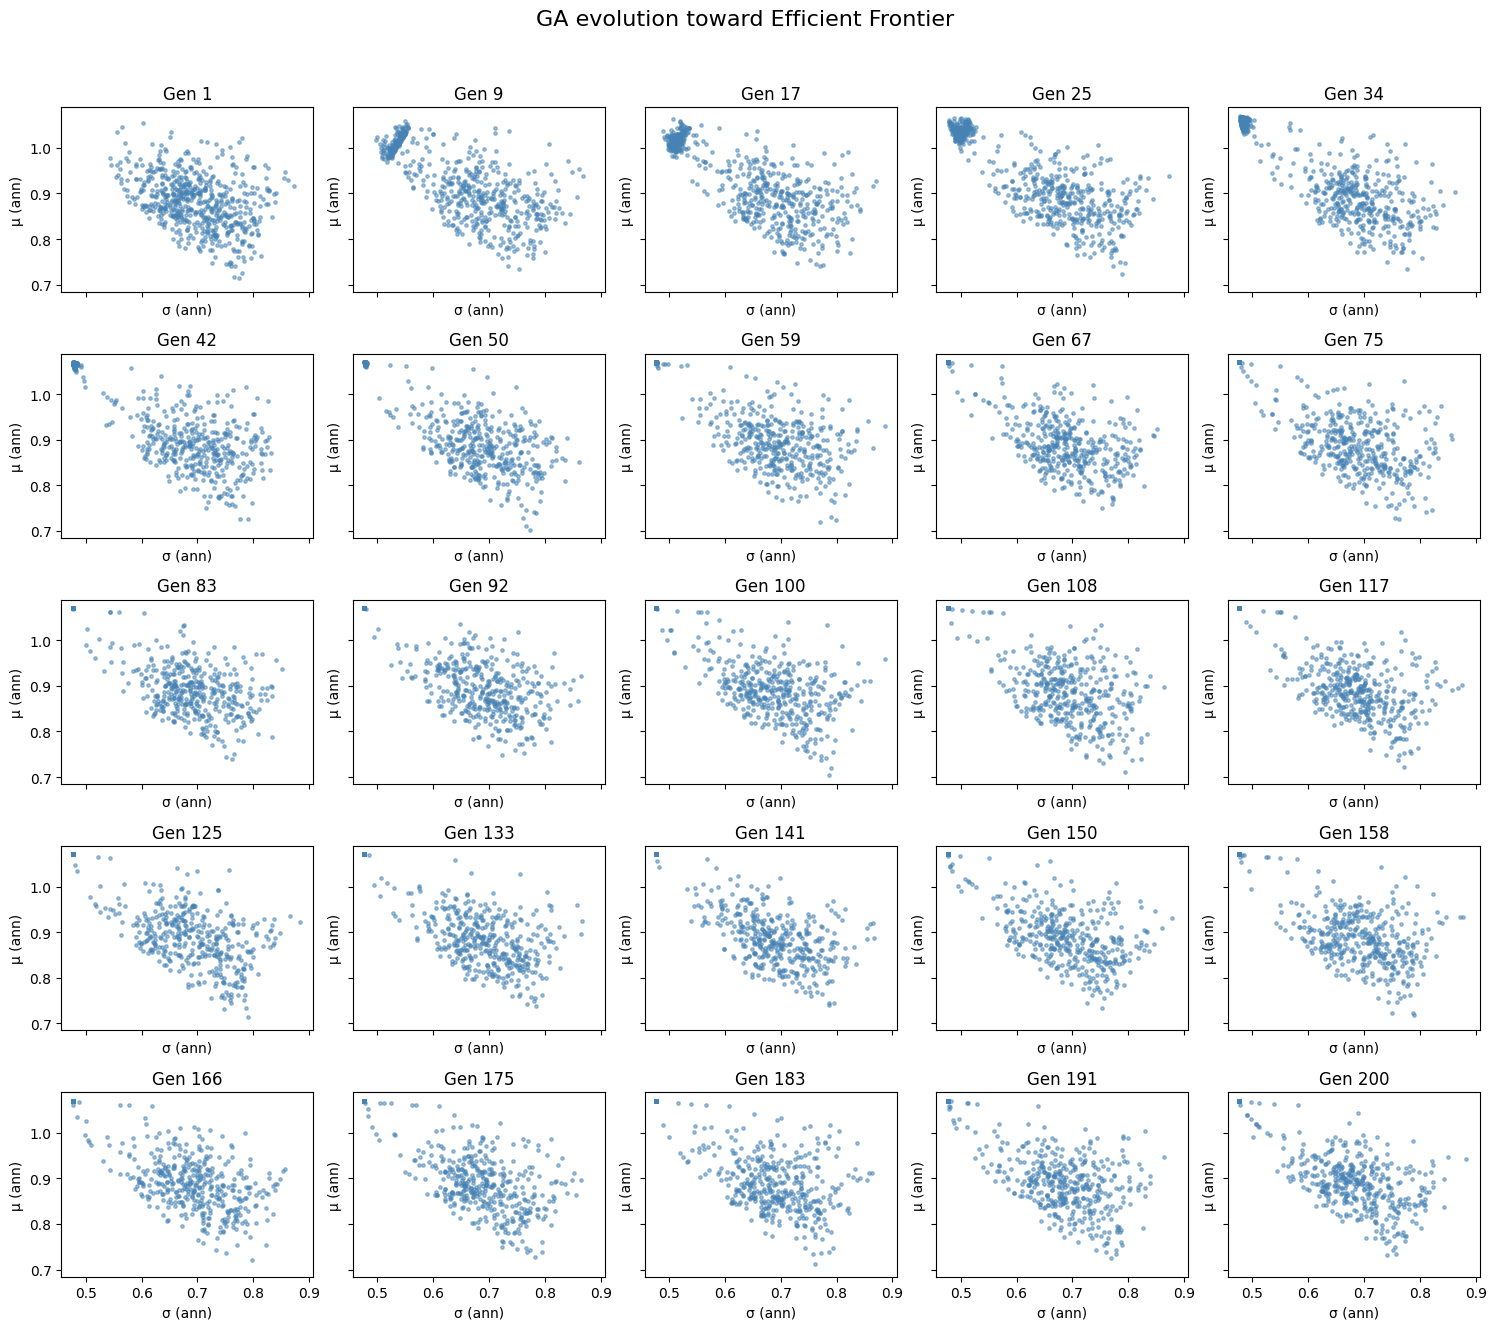

In [12]:
# --------------------------------------------------------------
# 6.1) –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞ –ø—ä—Ä–≤–æ—Ç–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ
# --------------------------------------------------------------
population = []
while len(population) < POP_SIZE:
    w = np.random.random(len(tickers))
    w /= w.sum()
    if (w > WEIGHT_CAP).any():
        continue
    population.append(w)

# --------------------------------------------------------------
# 6.2) –ï–≤–æ–ª—é—Ü–∏—è –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
# --------------------------------------------------------------
# fig, axs = plt.subplots(PLOT_X, PLOT_Y, figsize=(15, 13), sharex=True, sharey=True)
# axs = axs.flatten()

fig, axs = plt.subplots(PLOT_Y, PLOT_X, figsize=(15, 13),
                        sharex=True, sharey=True)
axs = axs.flatten()
MAX_PLOTS = PLOT_X * PLOT_Y      # 25

# –∫–æ–∏ –ø–æ–∫–æ–ª–µ–Ω–∏—è —â–µ —Ä–∏—Å—É–≤–∞–º–µ
if NB_GENERATIONS <= MAX_PLOTS:
    gens_to_plot = list(range(NB_GENERATIONS))
else:
    # —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–∏ –∏–Ω–¥–µ–∫—Å–∏, –≤–∏–Ω–∞–≥–∏ –≤–∫–ª—é—á–≤–∞ 0
    gens_to_plot = (np.linspace(0, NB_GENERATIONS - 1,
                                num=MAX_PLOTS, dtype=int)
                      .tolist())

print("–©–µ —Å–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–∞—Ç –ø–æ–∫–æ–ª–µ–Ω–∏—è:", gens_to_plot)

for g in range(NB_GENERATIONS):
    # ‚îÄ‚îÄ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∑–∞ —Ç–µ–∫—É—â–æ—Ç–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    res = np.zeros((2, POP_SIZE))            # œÉ, Œº  (–≥–æ–¥–∏—à–Ω–∏)
    for i, w in enumerate(population):
        mu_bar  = w @ means_bar
        sig_bar = np.sqrt(w @ cov_bar @ w)
        res[1, i] = mu_bar  * PERIODS_PER_YEAR
        res[0, i] = sig_bar * np.sqrt(PERIODS_PER_YEAR)

    # ‚îÄ‚îÄ —á–µ—Ä—Ç–∞–µ–º —Å–∞–º–æ –∞–∫–æ g e –≤ —Å–ø–∏—Å—ä–∫–∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    if g in gens_to_plot:
        plot_idx = gens_to_plot.index(g)     # 0 ‚Ä¶ 24
        ax = axs[plot_idx]
        ax.scatter(res[0], res[1], s=6, alpha=0.5, c='steelblue')
        ax.set_title(f'Gen {g+1}')
        ax.set_xlabel('œÉ (ann)')
        ax.set_ylabel('Œº (ann)')

    # ‚îÄ‚îÄ –µ–≤–æ–ª—é–∏—Ä–∞–º–µ –∫—ä–º —Å–ª–µ–¥–≤–∞—â–æ –ø–æ–∫–æ–ª–µ–Ω–∏–µ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    population = next_generation(population)

plt.suptitle('GA evolution toward Efficient Frontier', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [13]:
TOP_N = 20        # how many best portfolios you want to list

def ann_stats(w: np.ndarray) -> tuple[float, float, float]:
    mu_bar  = w @ means_bar
    sig_bar = np.sqrt(w @ cov_bar @ w)
    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)
    sharpe  = (mu_ann - RISK_FREE) / sig_ann
    return mu_ann, sig_ann, sharpe

# 1) take the best TOP_N by Sharpe
best_pop = sorted(population, key=fitness, reverse=True)[:TOP_N]

# 2) build one combined table
records = []
for rank, w in enumerate(best_pop, 1):
    mu, sig, shp = ann_stats(w)
    rec = {
        'Rank'      : rank,
        'Annual Œº'  : round(mu, 4),
        'Annual œÉ'  : round(sig, 4),
        'Sharpe'    : round(shp, 3)
    }
    # add the weights, rounded to 3 dp
    rec.update({tkr: round(w[i], 3) for i, tkr in enumerate(tickers)})
    records.append(rec)

top_df = (pd.DataFrame(records)
            .set_index('Rank')
            .sort_index())

display(top_df)


Annual Œº  Annual œÉ  Sharpe  BTC  ADA  ALGO  ANKR
Rank                                                  
1       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
2       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
3       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
4       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
5       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
6       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
7       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
8       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
9       1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
10      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
11      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
12      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
13      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
14      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
15      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
16      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
17      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
18      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
19      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0
20      1.0705    0.4766   2.246  1.0  0.0   0.0   0.0

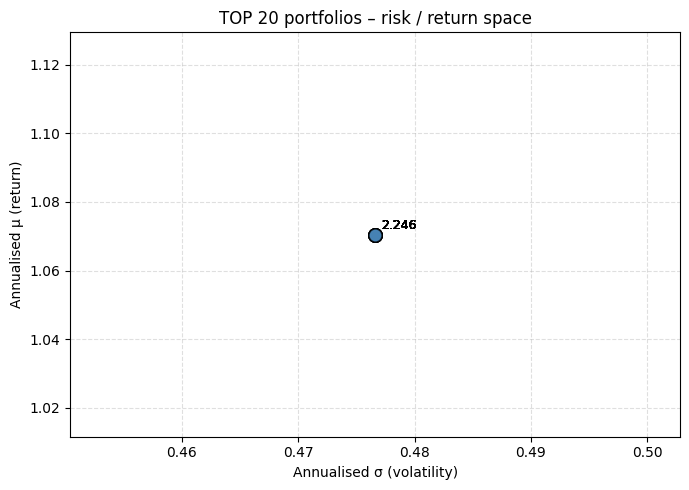

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(top_df['Annual œÉ'], top_df['Annual Œº'],
            s=90, color='steelblue', edgecolors='k', alpha=0.8)

# (–ø–æ –∂–µ–ª–∞–Ω–∏–µ) –µ—Ç–∏–∫–µ—Ç –∫—ä–º –≤—Å—è–∫–∞ —Ç–æ—á–∫–∞ ‚Äì –Ω–æ–º–µ—Ä—ä—Ç –≤ –∫–ª–∞—Å–∞—Ü–∏—è—Ç–∞
for rank, row in top_df.iterrows():
    plt.annotate(str(row['Sharpe']),
                 (row['Annual œÉ'], row['Annual Œº']),
                 textcoords="offset points",
                 xytext=(4, 4), ha='left', fontsize=9)

plt.xlabel('Annualised œÉ (volatility)')
plt.ylabel('Annualised Œº (return)')
plt.title(f'TOP {len(top_df)} portfolios ‚Äì risk / return space')
plt.grid(True, ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [17]:
best_w = top_df.iloc[0][tickers].to_dict()
best_w

# –ü–û–†–¢–§–ï–ô–õ –° –ú–ê–ö–°. SHARPE
#   –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : 98.79%
#   –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : 60.37%

# BTC	ADA	ALGO	ANKR
# Weight	0.5	0.11	0.09	0.3

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ü–û–†–¢–§–ï–ô–õ –° –ú–ò–ù. –í–û–õ–ê–¢–ò–õ–ù–û–°–¢
#   –ì–æ–¥. –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç : 90.08%
#   –ì–æ–¥. –≤–æ–ª–∞—Ç–∏–ª–Ω–æ—Å—Ç : 57.66%

# BTC	ADA	ALGO	ANKR
# Weight	0.5	0.31	0.12	0.07

{'BTC': 1.0, 'ADA': 0.0, 'ALGO': 0.0, 'ANKR': 0.0}

In [18]:
# -*- coding: utf-8 -*-
"""
Backtrader static-weight portfolio back-test
"""
import matplotlib
matplotlib.use('Agg')  
import backtrader as bt
import pandas as pd
from pathlib import Path


# ---------- –ü–∞—Ä–∞–º–µ—Ç—Ä–∏ ------------------------------------------------------

WEIGHTS = best_w

DATA_DIR       = Path('../resources/data/raw')   # –∫–æ—Ä–∏–≥–∏—Ä–∞–π –ø—ä—Ç—è, –∞–∫–æ –µ –Ω—É–∂–Ω–æ
STARTING_CASH  = 100_000
COMMISSION     = 0.001        # 0.1 %
REBALANCE_DAYS = 30         # –Ω–∞–ø—Ä. 30 –∑–∞ –º–µ—Å–µ—á–µ–Ω —Ä–µ–±–∞–ª–∞–Ω—Å


# ---------- –°—Ç—Ä–∞—Ç–µ–≥–∏—è ------------------------------------------------------

class StaticWeightStrategy(bt.Strategy):
    """
    –ü–æ–¥–¥—ä—Ä–∂–∞ —Ñ–∏–∫—Å–∏—Ä–∞–Ω–∏ —Ç–µ–≥–ª–∞. –†–µ–±–∞–ª–∞–Ω—Å–∏—Ä–∞:
      ‚Ä¢ –≤–µ–¥–Ω—ä–∂ –Ω–∞ –ø—ä—Ä–≤–∞—Ç–∞ —Å–≤–µ—â;
      ‚Ä¢ –ø—Ä–µ–∑ `rebalance_days`, –∞–∫–æ –µ –∑–∞–¥–∞–¥–µ–Ω–æ.
    """
    params = (
        ('weights',         None),
        ('rebalance_days',  None),
    )

    def __init__(self):
        self.rebalanced_init = False     # —â–µ —Ä–µ–±–∞–ª–∞–Ω—Å–∏—Ä–∞–º–µ –ø—Ä–∏ –ø—ä—Ä–≤–∞—Ç–∞ —Å–≤–µ—â
        self.last_rebalance  = None      # –∫–∞–ª–µ–Ω–¥–∞—Ä–Ω–æ —Å–ª–µ–¥–µ–Ω–µ (–∞–∫–æ –µ –Ω—É–∂–Ω–æ)

    # --------------------------------------------------
    def next(self):
        dt = self.datas[0].datetime.date(0)   # —Ç–µ–∫—É—â–∞ –¥–∞—Ç–∞

        # --- –ø—ä—Ä–≤–æ–Ω–∞—á–∞–ª–µ–Ω —Ä–µ–±–∞–ª–∞–Ω—Å ---------------------------------
        if not self.rebalanced_init:
            self.rebalance()
            self.rebalanced_init = True
            self.last_rebalance  = dt
            return                          # –∏–∑–ª–∏–∑–∞–º–µ, –∑–∞ –¥–∞ –Ω–µ —É–¥–≤–æ–∏–º —Ä–µ–±–∞–ª–∞–Ω—Å–∞

        # --- –ø–µ—Ä–∏–æ–¥–∏—á–µ–Ω —Ä–µ–±–∞–ª–∞–Ω—Å -----------------------------------
        if self.p.rebalance_days:
            if (dt - self.last_rebalance).days >= self.p.rebalance_days:
                self.rebalance()
                self.last_rebalance = dt

    # --------------------------------------------------
    def rebalance(self):
        """
        –ò–∑—Ä–∞–≤–Ω—è–≤–∞–Ω–µ –Ω–∞ –ø–æ–∑–∏—Ü–∏–∏—Ç–µ –∫—ä–º –∑–∞–¥–∞–¥–µ–Ω–∏—Ç–µ —Ç–µ–≥–ª–∞.
        """
        port_value = self.broker.getvalue()
        for data in self.datas:
            w = self.p.weights.get(data._name, 0.0)
            self.order_target_percent(data=data, target=w)

    # --------------------------------------------------
    def log(self, txt, dt=None):
        pass  # –º–∞—Ö–Ω–∏ 'pass' –∏ —Å–ª–æ–∂–∏ print, –∞–∫–æ –∏—Å–∫–∞—à –ª–æ–≥


# ---------- –ß–µ—Ç–µ–Ω–µ –Ω–∞ CSV ‚Üí DataFeed --------------------------------------

def load_feed(path: str | Path, name: str) -> bt.feeds.PandasData:
    """
    –ß–µ—Ç–µ 1-minute Binance CSV ‚Üí —Ä–µ—Å–µ–º–ø–ª–∏—Ä–∞ –∫—ä–º –¥–Ω–µ–≤–Ω–∏ —Å–≤–µ—â–∏.
    """
    df = (
        pd.read_csv(path, parse_dates=['timestamp'], index_col='timestamp')
          .sort_index()
          .resample('1D')
          .agg({'open':'first', 'high':'max', 'low':'min',
                'close':'last', 'volume':'sum'})
          .dropna()
    )

    print(f'{name}: {len(df):>4} –¥–Ω–∏ | {df.index.min().date()} ‚Üí {df.index.max().date()}')

    return bt.feeds.PandasData(
        dataname=df,
        name=name,
        timeframe=bt.TimeFrame.Days,
        compression=1
    )


# ---------- Cerebro pipeline ----------------------------------------------

cerebro = bt.Cerebro()

# 1) —Å—Ç—Ä–∞—Ç–µ–≥–∏—è
cerebro.addstrategy(
    StaticWeightStrategy,
    weights=WEIGHTS,
    rebalance_days=REBALANCE_DAYS
)

# 2) –±—Ä–æ–∫–µ—Ä
cerebro.broker.setcash(STARTING_CASH)
cerebro.broker.setcommission(commission=COMMISSION)
#  ‚ûú  BUY/SELL —Å—Ç—Ä–µ–ª–∫–∏
cerebro.addobserver(bt.observers.BuySell)     # üìà –ø–æ–∫–∞–∑–≤–∞ –º—è—Å—Ç–æ—Ç–æ –Ω–∞ –≤—Å–µ–∫–∏ –æ—Ä–¥–µ—Ä
cerebro.addobserver(bt.observers.Trades)      # üí¨ –±–∞–ª–æ–Ω–∏ —Å —Ä–µ–∑—É–ª—Ç–∞—Ç–∞ –æ—Ç —Å–¥–µ–ª–∫–∞—Ç–∞

# 3) –¥–∞–Ω–Ω–∏
cerebro.adddata(load_feed(DATA_DIR / 'BTC_USDT_1m.csv',  'BTC'))
cerebro.adddata(load_feed(DATA_DIR / 'ADA_USDT_1m.csv',  'ADA'))
cerebro.adddata(load_feed(DATA_DIR / 'ALGO_USDT_1m.csv', 'ALGO'))
cerebro.adddata(load_feed(DATA_DIR / 'ANKR_USDT_1m.csv', 'ANKR'))

# ---------- –ë–µ–∫—Ç–µ—Å—Ç --------------------------------------------------------

print(f'\nüü°  Starting Portfolio Value: {cerebro.broker.getvalue():,.2f}')
cerebro.run()
print(f'üü¢  Final Portfolio Value:    {cerebro.broker.getvalue():,.2f}')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)
figs = cerebro.plot(iplot=True,                 # True = –∏–∑–∫–∞—Ä–≤–∞ –¥–∏—Ä–µ–∫—Ç–Ω–æ –≤ cell-–∞
             style='candlestick',
             volume=False,
             barup='lime', bardown='red')
fig = figs[0][0]                              # –ø—ä—Ä–≤–∏—è—Ç (–∏ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω) –ø—Ä–æ–∑–æ—Ä–µ—Ü
fig.savefig('4_assets_backtest_chart.png', dpi=300)    # => ./backtest_chart.png
print('–ì—Ä–∞—Ñ–∏–∫–∞—Ç–∞ –µ –∑–∞–ø–∏—Å–∞–Ω–∞ –≤ backtest_chart.png')
# cerebro.plot(style='candlestick')   # –º–∞—Ö–Ω–∏ –∫–æ–º–µ–Ω—Ç–∞—Ä–∞ –∑–∞ –≥—Ä–∞—Ñ–∏–∫–∞


BTC:  366 –¥–Ω–∏ | 2023-06-09 ‚Üí 2024-06-08
ADA:  366 –¥–Ω–∏ | 2023-06-09 ‚Üí 2024-06-08
ALGO:  366 –¥–Ω–∏ | 2023-06-09 ‚Üí 2024-06-08
ANKR:  366 –¥–Ω–∏ | 2023-06-09 ‚Üí 2024-06-08

üü°  Starting Portfolio Value: 100,000.00
üü¢  Final Portfolio Value:    228,565.49


<IPython.core.display.Javascript object>

–ì—Ä–∞—Ñ–∏–∫–∞—Ç–∞ –µ –∑–∞–ø–∏—Å–∞–Ω–∞ –≤ backtest_chart.png
